<a href="https://colab.research.google.com/github/manishkolla/Zillow-Home-Value-Prediction/blob/main/Zillow_Home_Value_Prediction_(FinalProject).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project Name: Zillow Home Value Prediction

### Manish Kolla
### Hemanth Gorrepati
### Sumanth Chinnamudiam

Data Source:
https://www.zillow.com/research/data/

google drive link for running the colab or ipynb file.
https://drive.google.com/drive/folders/1lAp-y5FHtPeJnoGu4oDddtiJq9kcamgI?usp=drive_link


In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


Importing the Modules

In [2]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.impute import KNNImputer
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import StratifiedKFold
import numpy as np
import math
from datetime import datetime

Reading the CSV Files

In [3]:
#reading the csv files
bedroom1=pd.read_csv("drive/MyDrive/FDS project/1Bed_county.csv")
bedroom2=pd.read_csv("drive/MyDrive/FDS project/2Bed_county.csv")
bedroom3=pd.read_csv("drive/MyDrive/FDS project/3Bed_county.csv")
bedroom4=pd.read_csv("drive/MyDrive/FDS project/4Bed_county.csv")
bedroom5=pd.read_csv("drive/MyDrive/FDS project/5Bed_county.csv")
df1 = pd.DataFrame(bedroom1)
df2 = pd.DataFrame(bedroom2)
df3 = pd.DataFrame(bedroom3)
df4 = pd.DataFrame(bedroom4)
df4 = pd.DataFrame(bedroom4)
df5=  pd.DataFrame(bedroom5)

Checking for Nulls Values greater than 50%

In [4]:
def null(df):
  print(len(df.columns[(df.isnull().sum() / len(df)) > 0.5]))
null(df1)
null(df2)
null(df3)
null(df4)
null(df5)

108
107
107
98
77


Checking for Nulls Values greater than 65%

In [5]:
def null(df):
  print(len(df.columns[(df.isnull().sum() / len(df)) > 0.65]))
null(df1)
null(df2)
null(df3)
null(df4)
null(df5)

4
0
0
0
0


Checking for Duplicates

In [6]:
print(df1[df1.duplicated()])
print(df2[df2.duplicated()])
print(df3[df3.duplicated()])
print(df4[df4.duplicated()])
print(df5[df5.duplicated()])

Empty DataFrame
Columns: [RegionID, SizeRank, RegionName, RegionType, StateName, State, Metro, StateCodeFIPS, MunicipalCodeFIPS, 2000-01-31, 2000-02-29, 2000-03-31, 2000-04-30, 2000-05-31, 2000-06-30, 2000-07-31, 2000-08-31, 2000-09-30, 2000-10-31, 2000-11-30, 2000-12-31, 2001-01-31, 2001-02-28, 2001-03-31, 2001-04-30, 2001-05-31, 2001-06-30, 2001-07-31, 2001-08-31, 2001-09-30, 2001-10-31, 2001-11-30, 2001-12-31, 2002-01-31, 2002-02-28, 2002-03-31, 2002-04-30, 2002-05-31, 2002-06-30, 2002-07-31, 2002-08-31, 2002-09-30, 2002-10-31, 2002-11-30, 2002-12-31, 2003-01-31, 2003-02-28, 2003-03-31, 2003-04-30, 2003-05-31, 2003-06-30, 2003-07-31, 2003-08-31, 2003-09-30, 2003-10-31, 2003-11-30, 2003-12-31, 2004-01-31, 2004-02-29, 2004-03-31, 2004-04-30, 2004-05-31, 2004-06-30, 2004-07-31, 2004-08-31, 2004-09-30, 2004-10-31, 2004-11-30, 2004-12-31, 2005-01-31, 2005-02-28, 2005-03-31, 2005-04-30, 2005-05-31, 2005-06-30, 2005-07-31, 2005-08-31, 2005-09-30, 2005-10-31, 2005-11-30, 2005-12-31, 2006-01

Removal of Columns with null values: The best solution in this dataset when handling null values is to remove the columns from years 2000 till 2008 such that the rest of the data will be having minimal number of null values.


In [7]:
df1.drop(df1.columns[9:117], axis=1, inplace=True)
df2.drop(df2.columns[9:117], axis=1, inplace=True)
df3.drop(df3.columns[9:117], axis=1, inplace=True)
df4.drop(df4.columns[9:117], axis=1, inplace=True)
df5.drop(df5.columns[9:117], axis=1, inplace=True)

## Data Imputation

Imputing the Column Metro with 1 if it has a metro area, else 0

In [8]:
def metro(df):
  df.fillna(0, inplace=True)
  df['Metro'] = df['Metro'].apply(lambda x: 1 if x != 0 else x)
metro(df1)
metro(df2)
metro(df3)
metro(df4)
metro(df5)

### Median Imputation

In [9]:
def median_imputation(df):
  states=df["State"].unique()
  for state in states:
      grouped = df[df["State"] == state]
      for date in df.iloc[:,10:].columns:
          m=grouped[date].median()
          grouped[date].fillna(m, inplace=True)
      df.update(grouped)
# median_imputation(df1)
# median_imputation(df2)
# median_imputation(df3)
# median_imputation(df4)
# median_imputation(df5)

### KNN Imputation (Distance)

In [10]:
def knnimputation(df_name):
  date_columns = df_name.columns[9:]
  date_columns= pd.to_datetime(date_columns)
  # Create a list of the date columns
  date_columns = df_name.columns[9:]
  # Create a KNNImputer model
  imputer = KNNImputer(n_neighbors=51, weights='distance')

  # Fit the model to the data
  imputer.fit(df_name[date_columns])

  # Impute the missing values in the date columns
  df_name[date_columns] = imputer.transform(df_name[date_columns])

# knnimputation(df1)
# knnimputation(df2)
# knnimputation(df3)
# knnimputation(df4)
# knnimputation(df5)

### KNN Imputation (Uniform Weights)

In [11]:
def knnimputation_weights(df_name):
  date_columns = df_name.columns[9:]
  date_columns= pd.to_datetime(date_columns)
  # Create a list of the date columns
  date_columns = df_name.columns[9:]
  # Create a KNNImputer model
  imputer = KNNImputer(n_neighbors=51, weights='uniform')

  # Fit the model to the data
  imputer.fit(df_name[date_columns])

  # Impute the missing values in the date columns
  df_name[date_columns] = imputer.transform(df_name[date_columns])
# knnimputation_weights(df1)
# knnimputation_weights(df2)
# knnimputation_weights(df3)
# knnimputation_weights(df4)
# knnimputation_weights(df5)

### Forward/bacward Filling

In [12]:
def combined_fill(df1):
  for i in range(len(df1)):
    for col in df1.columns:
      if pd.isna(df1.loc[i, col]):
        if i == 0:
          # First row, use back filling
          for j in range(i+1, len(df1)):
            if not pd.isna(df1.loc[j, col]):
              df1.loc[i, col] = df1.loc[j, col]
              break
        else:
          # Use forward filling
          for j in range(i-1, -1, -1):
            if not pd.isna(df1.loc[j, col]):
              df1.loc[i, col] = df1.loc[j, col]
              break
  return df1

df1 = combined_fill(df1)
df2 = combined_fill(df2)
df3 = combined_fill(df3)
df4 = combined_fill(df4)
df5 = combined_fill(df5)

### Merging the Data

In [13]:
df1.insert(0,"Bedrooms", 1)
df2.insert(0,"Bedrooms", 2)
df3.insert(0,"Bedrooms", 3)
df4.insert(0,"Bedrooms", 4)
df5.insert(0,"Bedrooms", 5)

In [14]:
df=pd.concat([df1,df2,df3,df4,df5])

Dropping the non used features

In [15]:
df.drop(['RegionType','StateName','StateCodeFIPS','MunicipalCodeFIPS','SizeRank','RegionName'], axis=1, inplace=True)

### Melting the Data

In [16]:
# Melting the dataframe to transform dates into rows and transpose
melted_df = pd.melt(df, id_vars=['RegionID','Metro', 'State', 'Bedrooms'], var_name='Date', value_name='Price')
melted_df['Date'] = pd.to_datetime(melted_df['Date'])

# Encoding RegionID using LabelEncoder
label_encoder = LabelEncoder()
melted_df['State'] = label_encoder.fit_transform(melted_df['State'])

# Converting Date to numerical format by replacing it with the number of days since the start date which is Jan 2009
melted_df['Days'] = (melted_df['Date'] - melted_df['Date'].min()).dt.days

Label Encoding for States

In [17]:
states = label_encoder.classes_
state_values = dict(enumerate(states))

print(f"State Values: {state_values}")

State Values: {0: 'AK', 1: 'AL', 2: 'AR', 3: 'AZ', 4: 'CA', 5: 'CO', 6: 'CT', 7: 'DC', 8: 'DE', 9: 'FL', 10: 'GA', 11: 'HI', 12: 'IA', 13: 'ID', 14: 'IL', 15: 'IN', 16: 'KS', 17: 'KY', 18: 'LA', 19: 'MA', 20: 'MD', 21: 'ME', 22: 'MI', 23: 'MN', 24: 'MO', 25: 'MS', 26: 'MT', 27: 'NC', 28: 'ND', 29: 'NE', 30: 'NH', 31: 'NJ', 32: 'NM', 33: 'NV', 34: 'NY', 35: 'OH', 36: 'OK', 37: 'OR', 38: 'PA', 39: 'RI', 40: 'SC', 41: 'SD', 42: 'TN', 43: 'TX', 44: 'UT', 45: 'VA', 46: 'VT', 47: 'WA', 48: 'WI', 49: 'WV', 50: 'WY'}


### BoxPlots

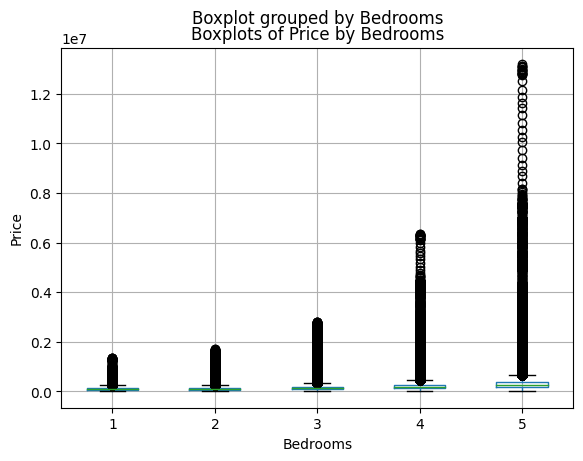

In [18]:
melted_df.boxplot(by=['Bedrooms'], column='Price')
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.title('Boxplots of Price by Bedrooms')
plt.show()


### Line Plots

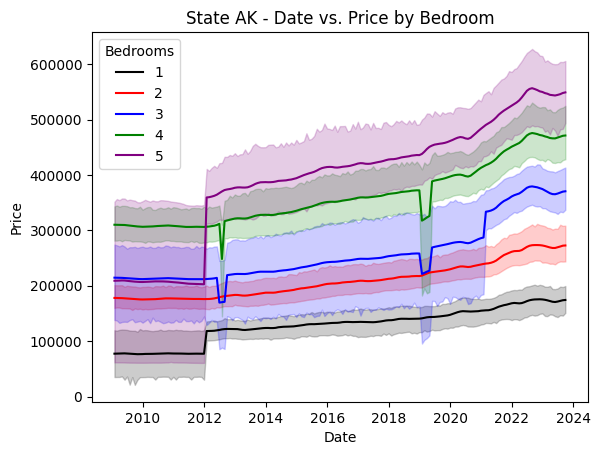

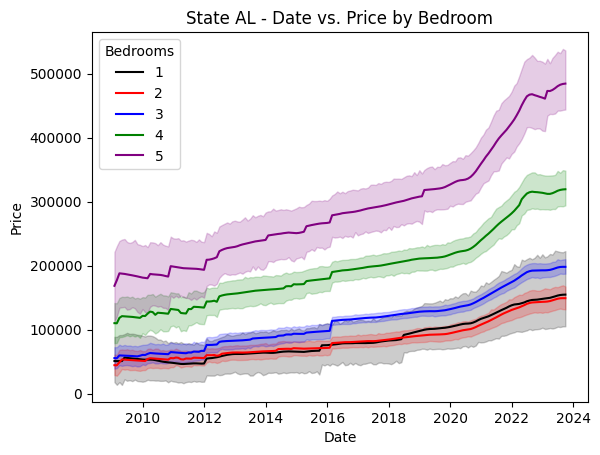

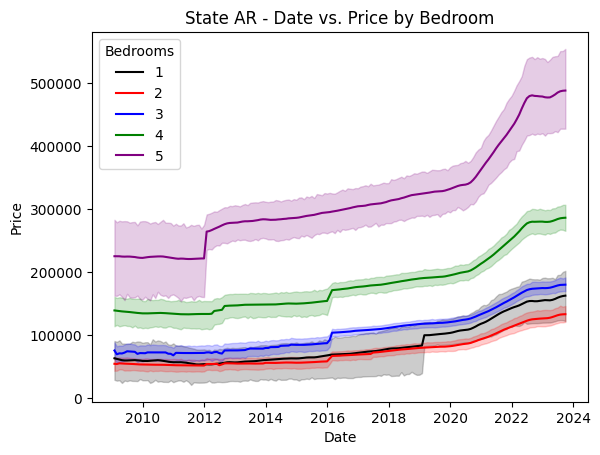

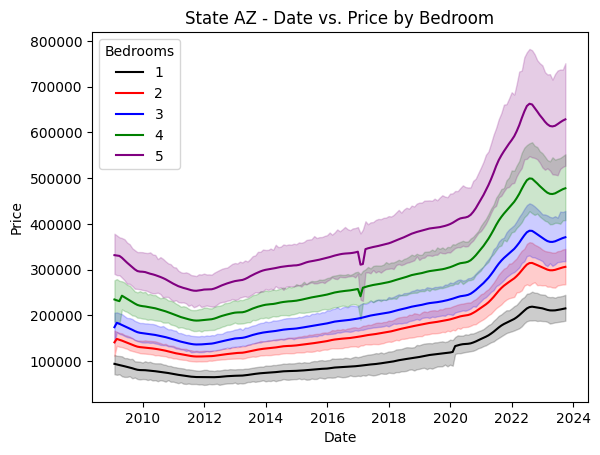

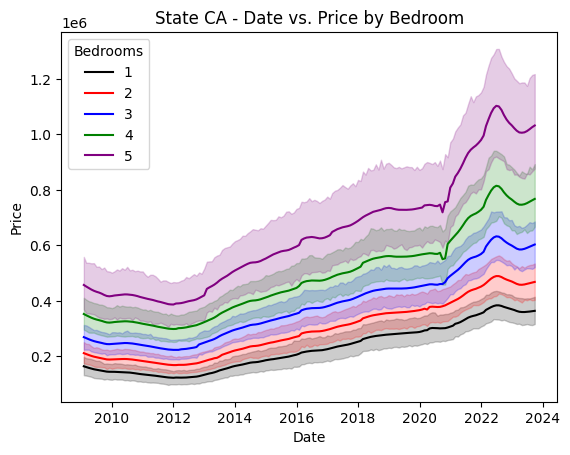

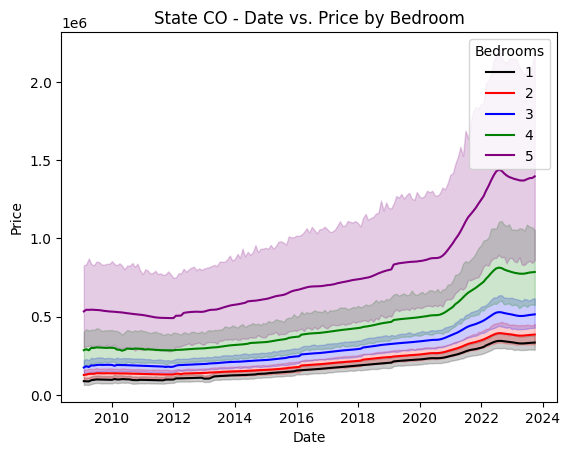

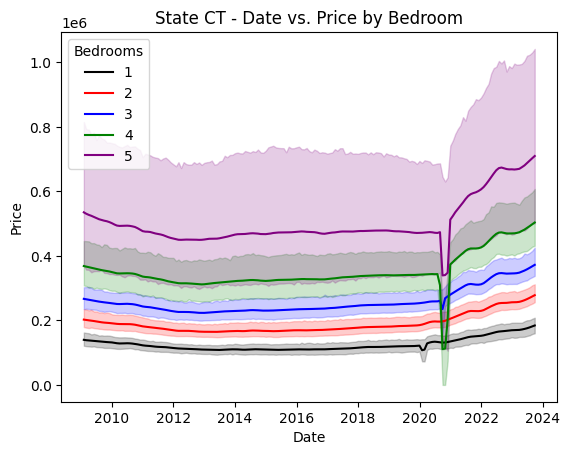

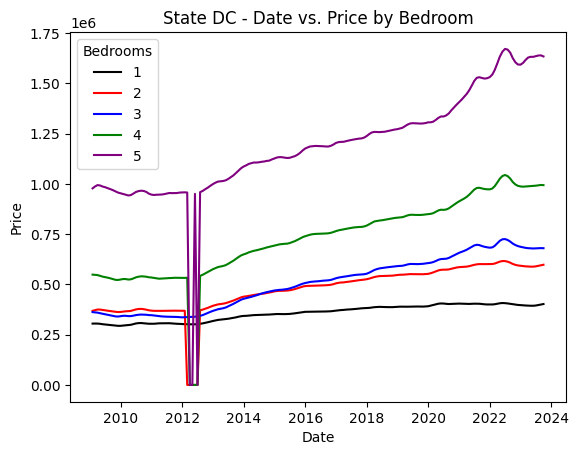

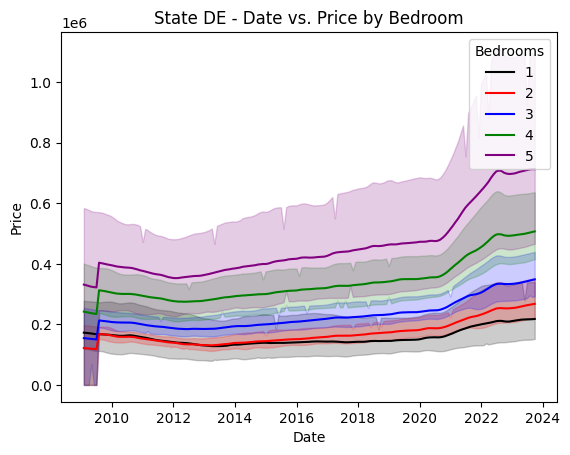

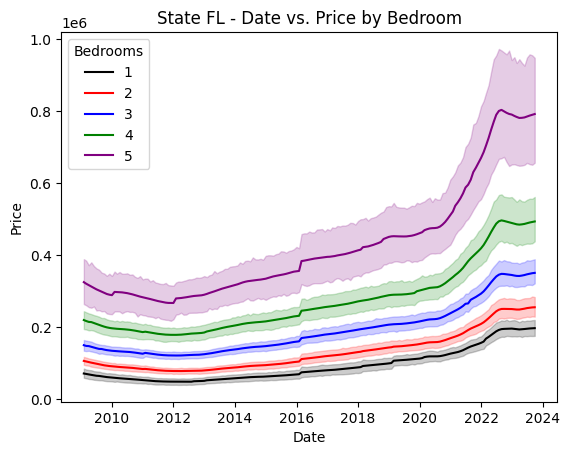

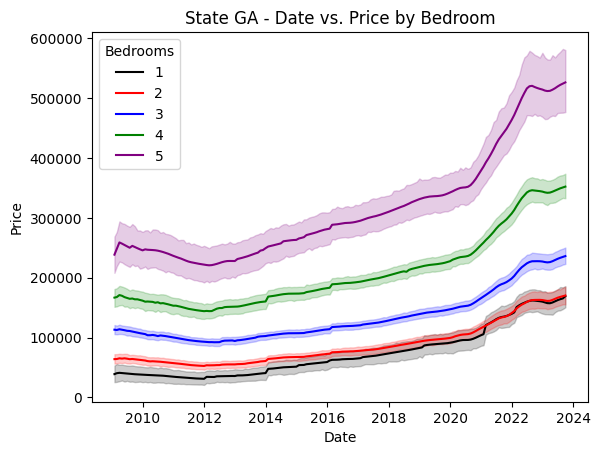

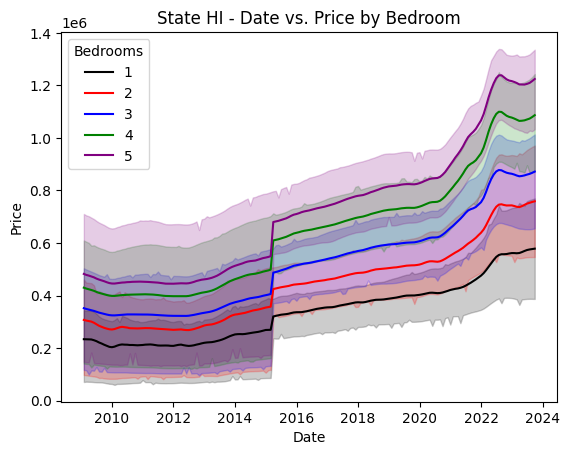

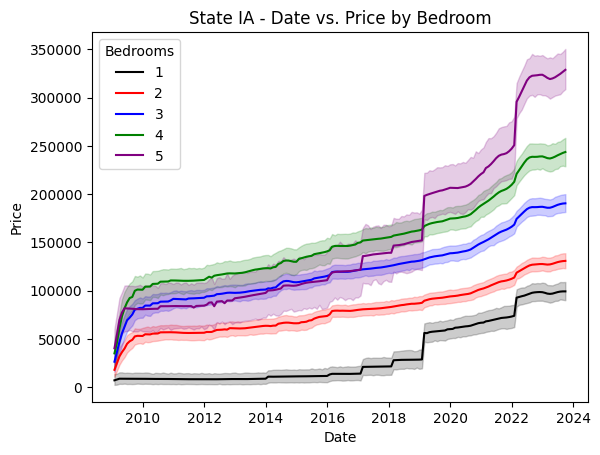

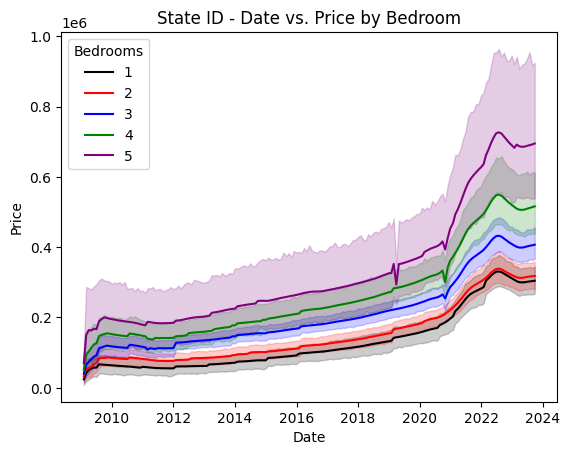

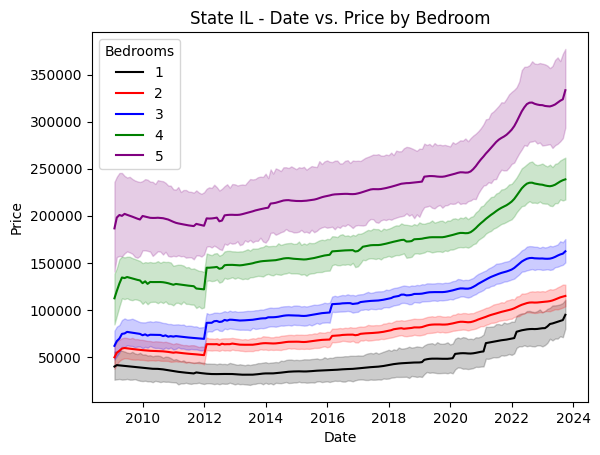

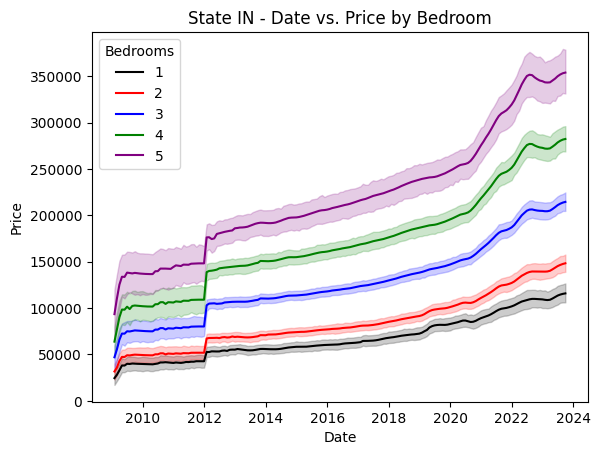

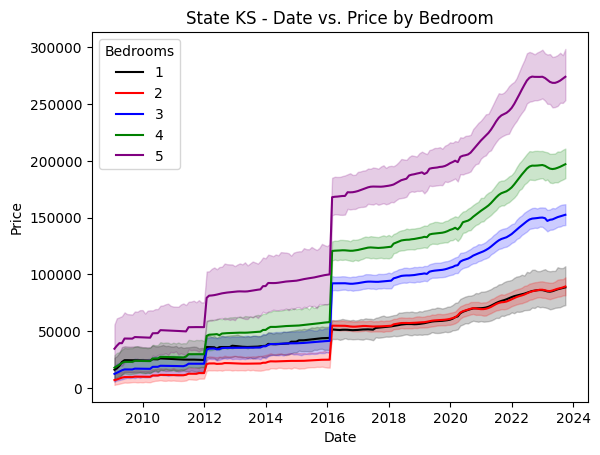

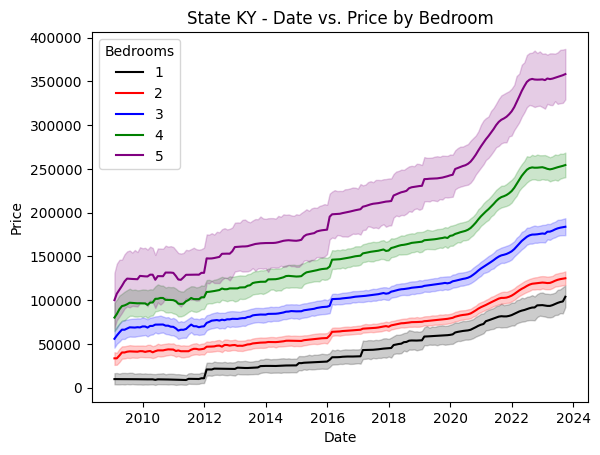

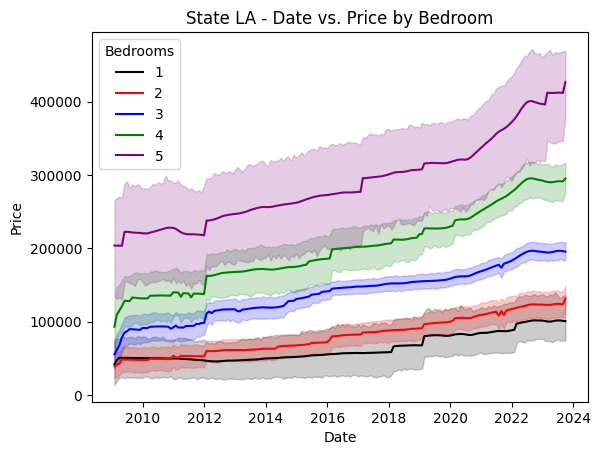

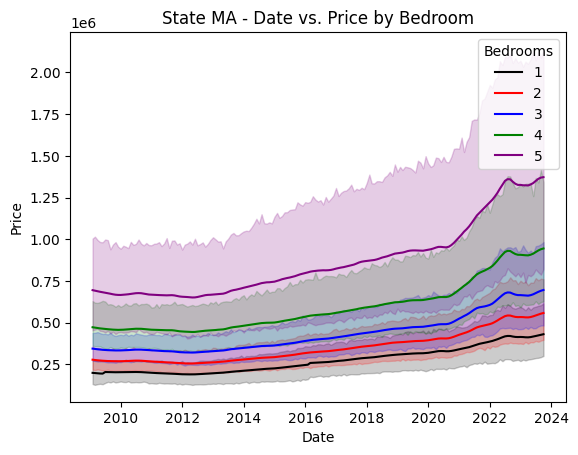

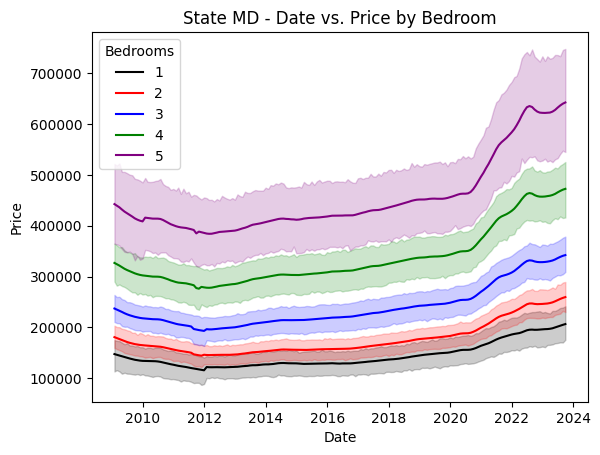

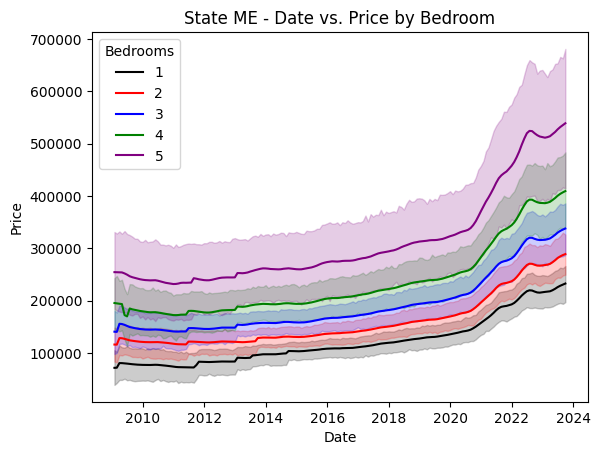

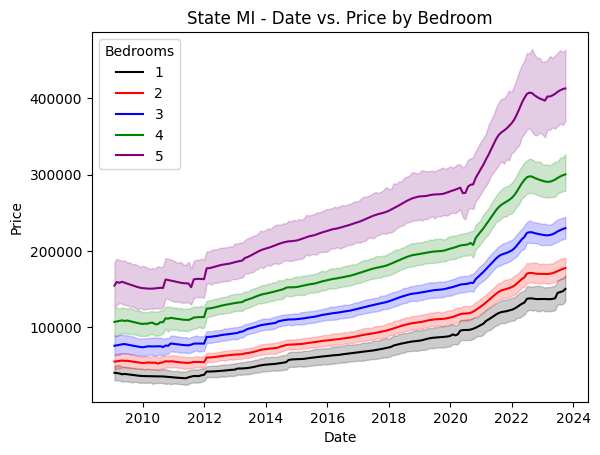

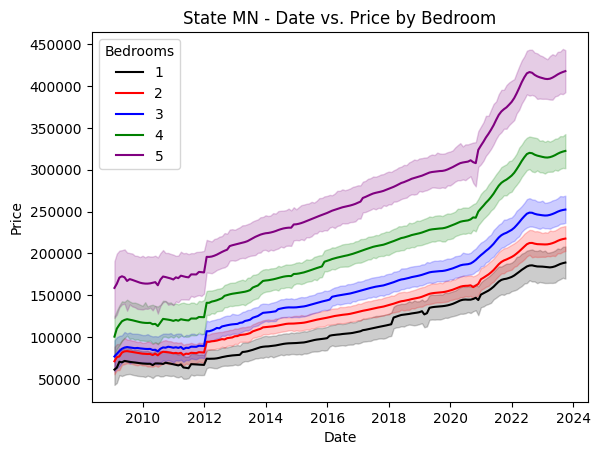

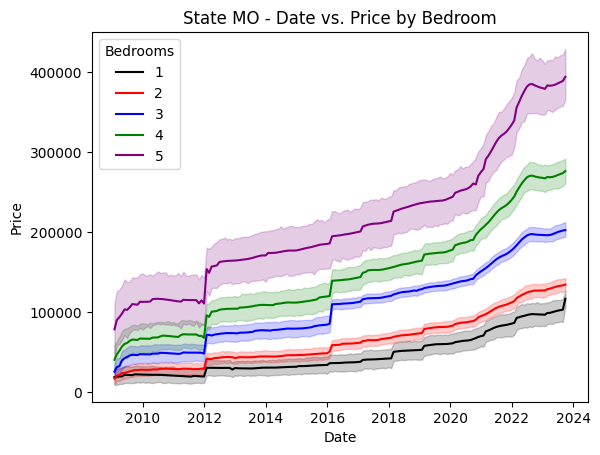

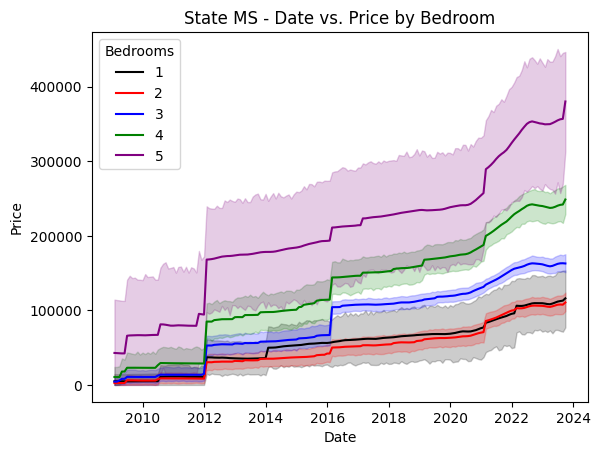

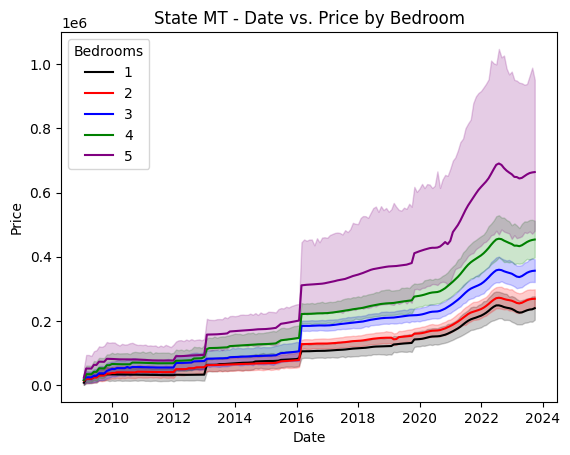

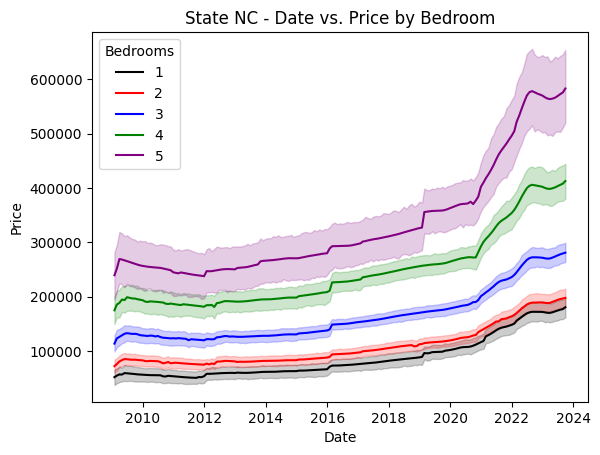

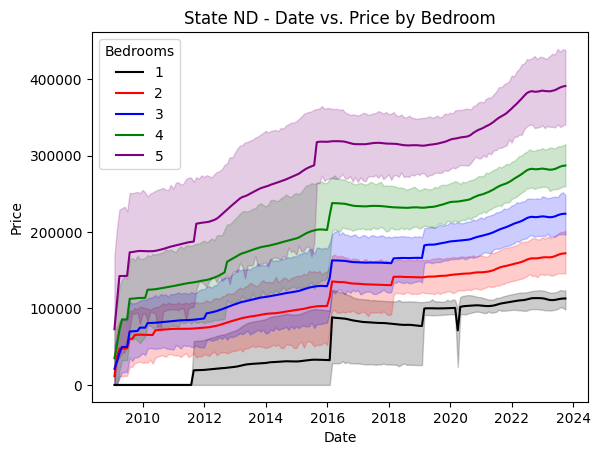

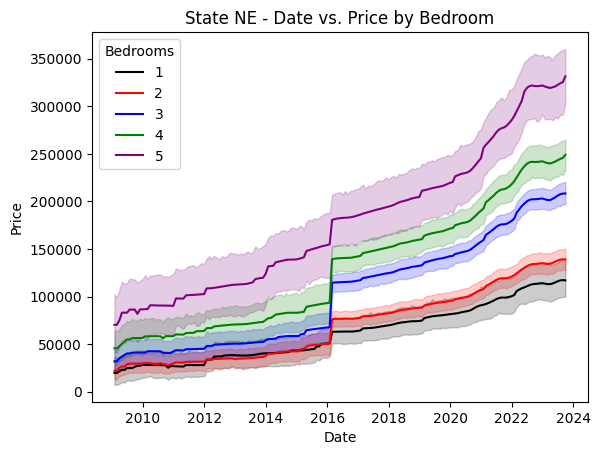

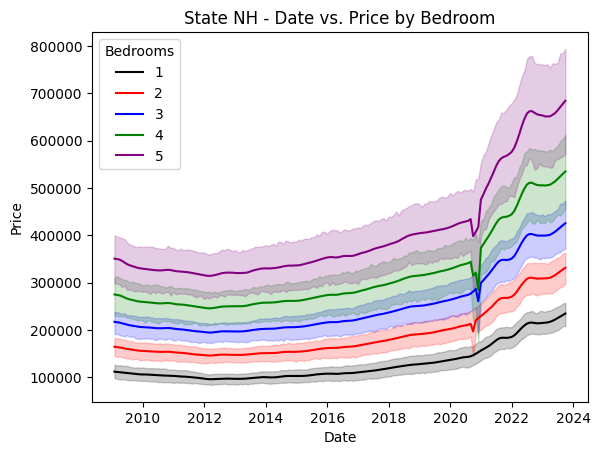

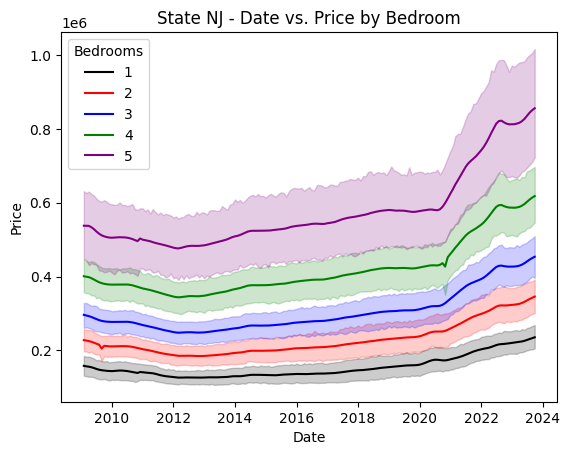

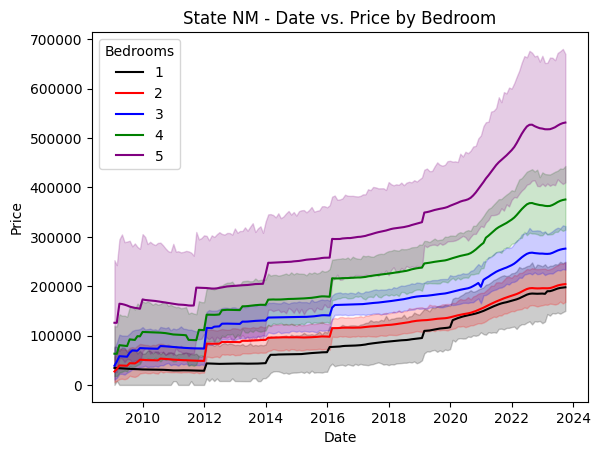

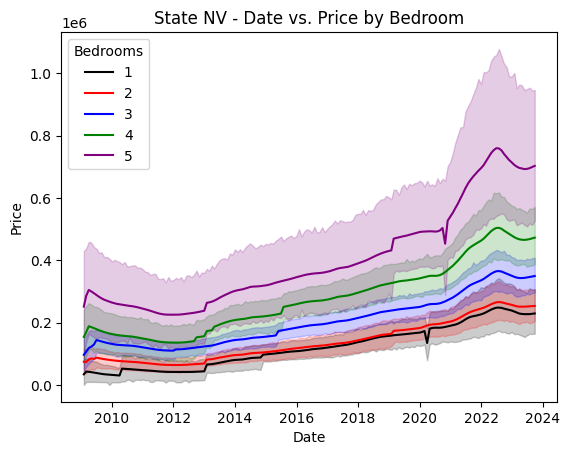

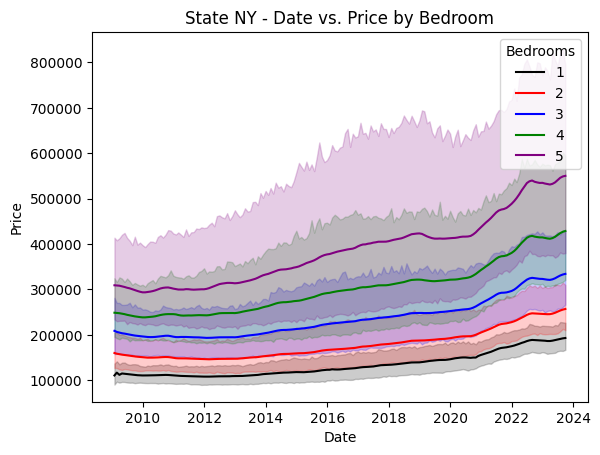

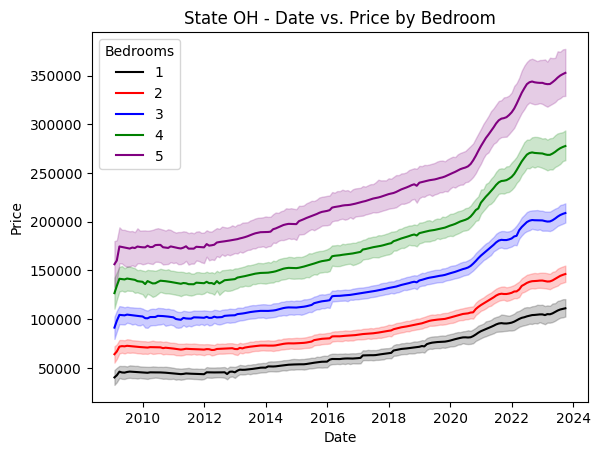

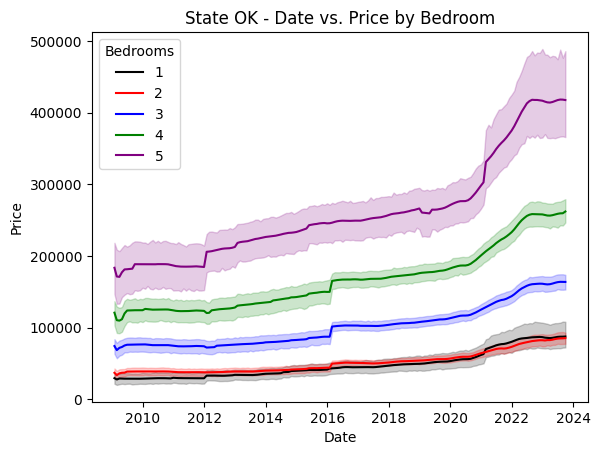

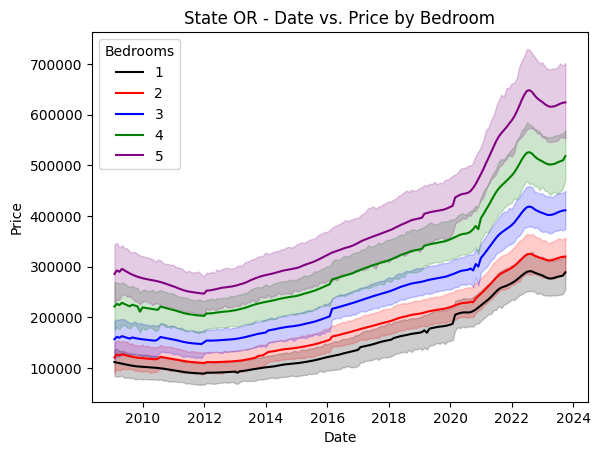

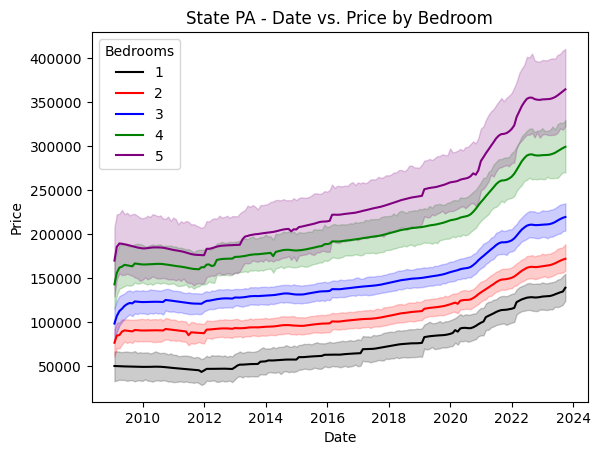

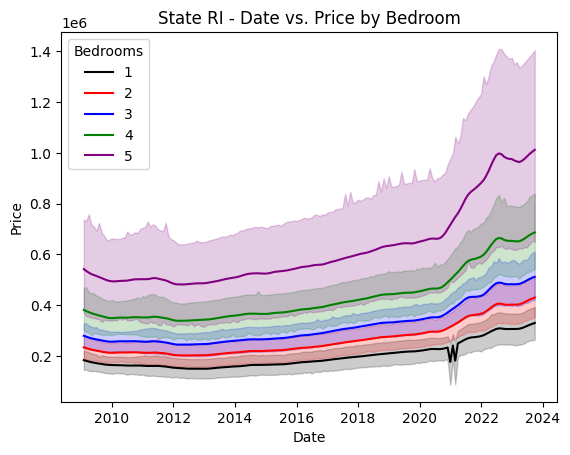

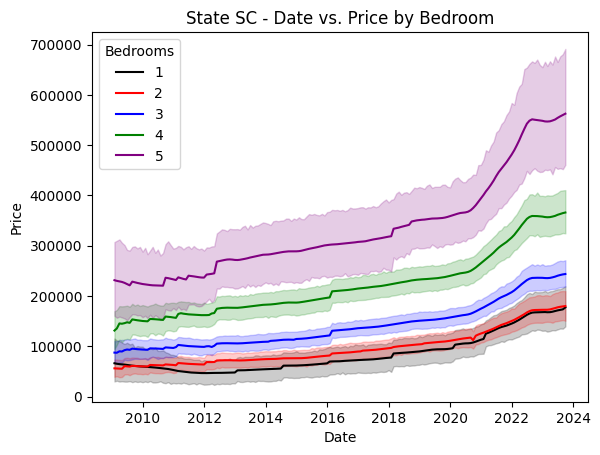

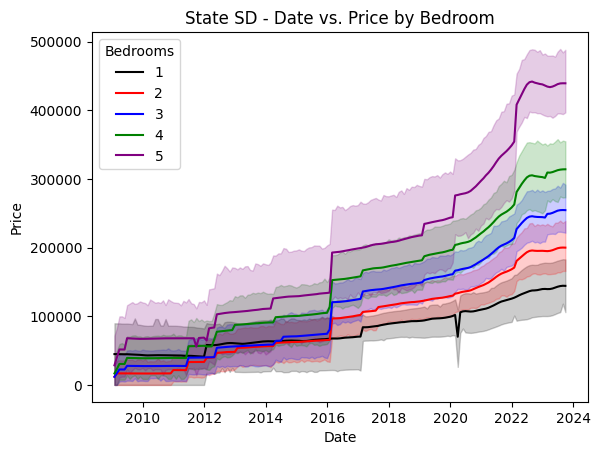

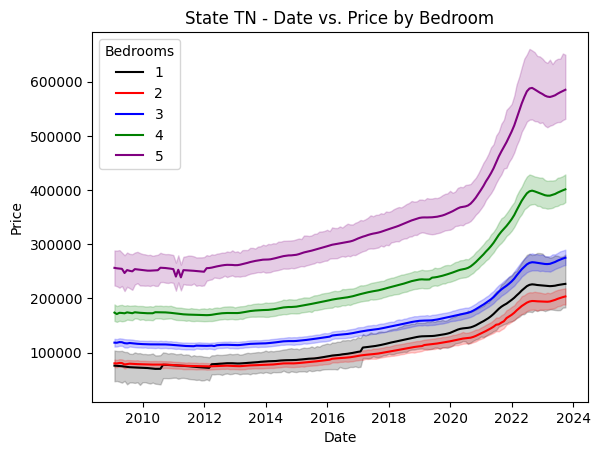

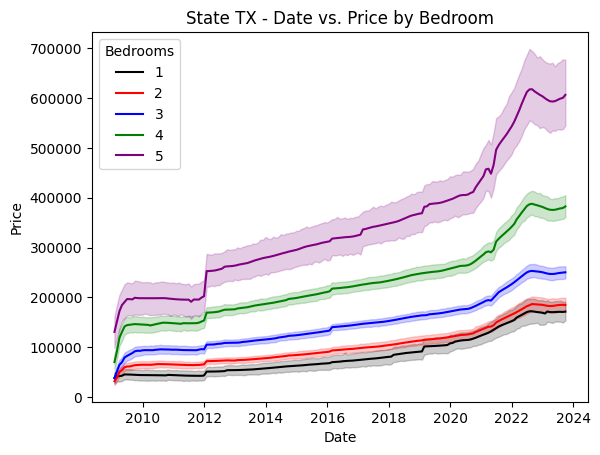

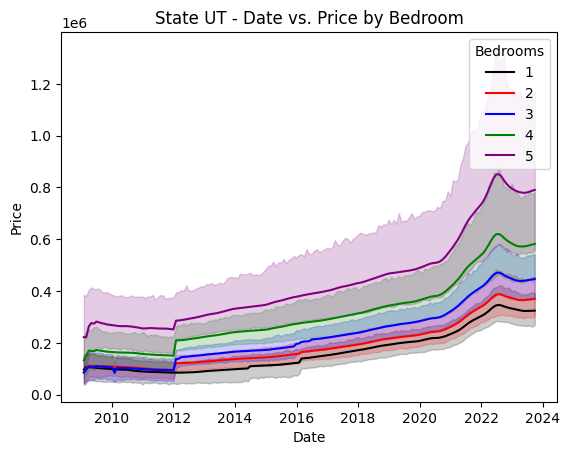

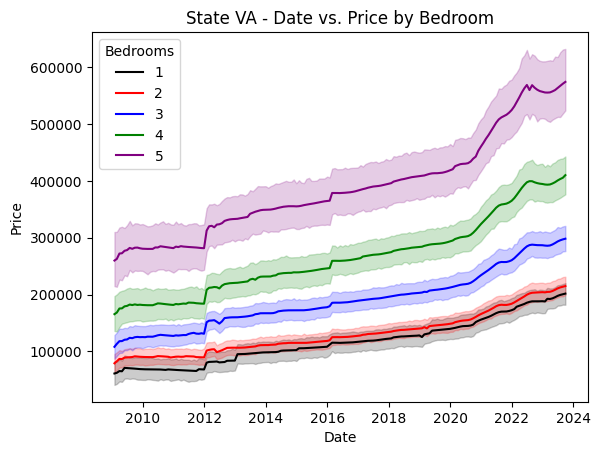

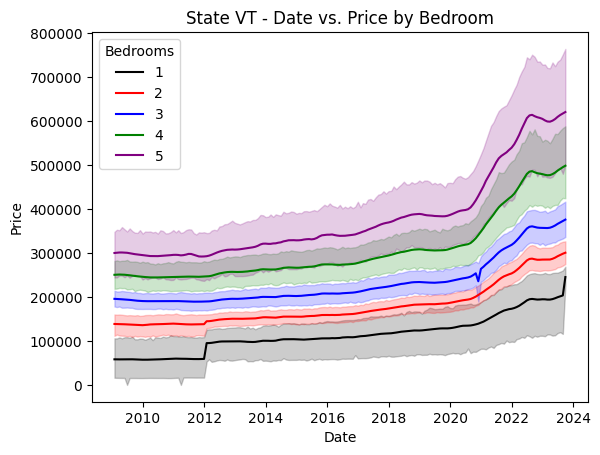

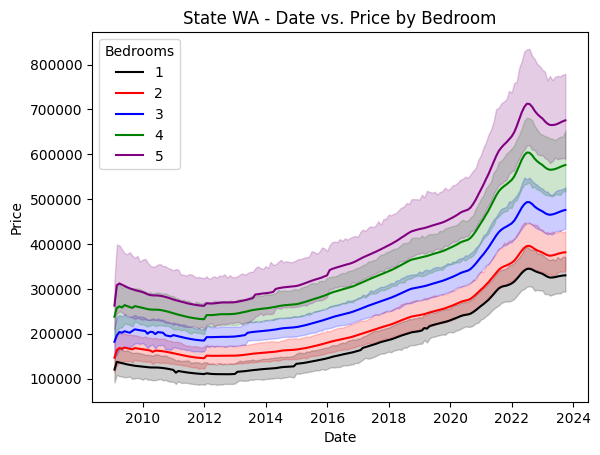

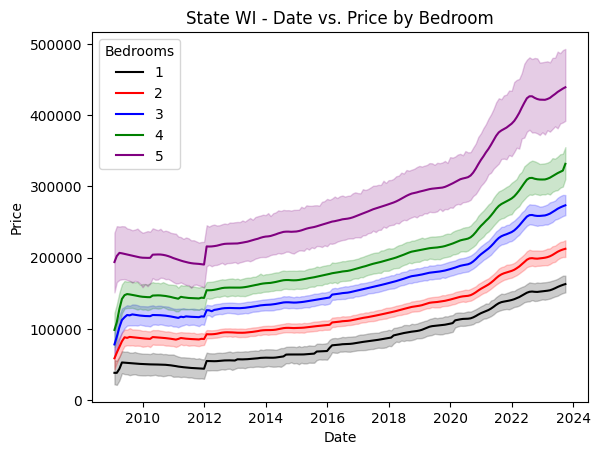

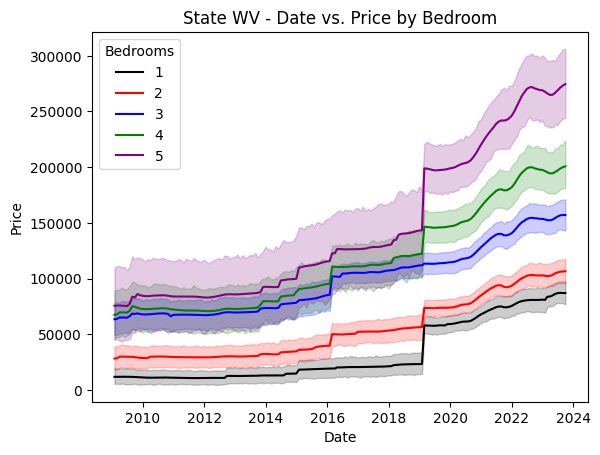

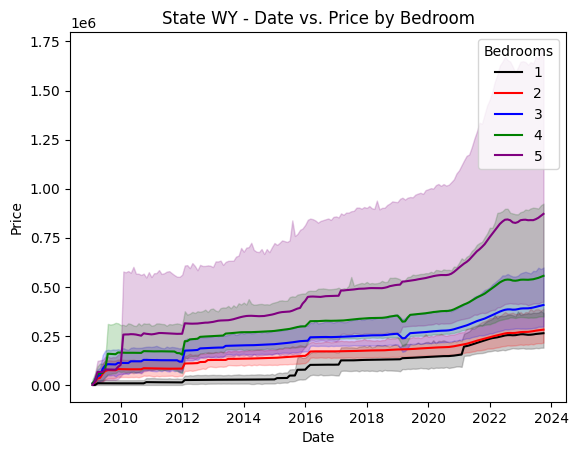

In [142]:
# Function to generate scatter plot and SPLOM for a state
def plot_state(state_number):
    state_df = melted_df[melted_df['State'] == state_number]

    # Scatter plot between Date and Price
    colors = {1: "black",2: "red", 3: "blue", 4: "green", 5: "purple"}
    sns.lineplot(x="Date", y="Price",hue="Bedrooms",palette=colors,  data=state_df)
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.title(f"State {state_values[state_number]} - Date vs. Price by Bedroom")
    plt.show()

# Loop through all state numbers (0-50)
for state_number in range(51):
    plot_state(state_number)


In [76]:
melted_df

RegionID  Metro  State  Bedrooms       Date          Price  Days
0            3101      1      4         1 2009-01-31  275306.849619     0
1             139      1     14         1 2009-01-31  154860.938646     0
2            1090      1     43         1 2009-01-31   62285.163536     0
3            2402      1      3         1 2009-01-31   95969.312405     0
4            2841      1      4         1 2009-01-31  212362.749410     0
...           ...    ...    ...       ...        ...            ...   ...
1976023      1969      0     41         5 2023-09-30  301486.315206  5355
1976024      1665      0     16         5 2023-09-30  147873.292483  5355
1976025      1994      0     16         5 2023-09-30  165111.289914  5355
1976026      2542      0     16         5 2023-09-30  238497.833185  5355
1976027      1048      0     16         5 2023-09-30  166878.701382  5355

[1976028 rows x 7 columns]

## Machine Learning Models

### Training Testing Random Split

#### Linear Regression

In [18]:
X = melted_df[['Metro','State','Bedrooms', 'Days']]
y = melted_df['Price']

# Splitting the data into training and testing sets using the split 80:20
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X, y, test_size=0.2, random_state=42)

#training the model for Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train_lr, y_train_lr)
y_pred_lr = lr_model.predict(X_test_lr)

# Evaluating the Linear Regression model
mse_lr = mean_squared_error(y_test_lr, y_pred_lr)
r2_lr = r2_score(y_test_lr, y_pred_lr)
mae_lr = mean_absolute_error(y_test_lr, y_pred_lr)

print(f'Mean Squared Error (Linear Regression): {mse_lr}')
print(f'R-squared (Linear Regression): {r2_lr}')
print(f'Mean Absolute Error (Linear Regression):{mae_lr}')

Mean Squared Error (Linear Regression): 34280234436.052044
R-squared (Linear Regression): 0.21414728945117978
Mean Absolute Error (Linear Regression):87722.54035392436


#### Random Forest

In [21]:
#defining x and y variables for training the dataset
X = melted_df[['Metro','State','Bedrooms', 'Days']]
y = melted_df['Price']

# Splitting the data into training and testing sets using the split 80:20
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X, y, test_size=0.2, random_state=42)

#training the model for Random Forest Regresson and transforming and using the prediction function
rf_model = RandomForestRegressor(n_estimators=150, random_state=45)
rf_model.fit(X_train_rf, y_train_rf)
y_pred_rf = rf_model.predict(X_test_rf)

# Evaluating the Random Forest model
mse_rf = mean_squared_error(y_test_rf, y_pred_rf)
r2_rf = r2_score(y_test_rf, y_pred_rf)
mae_rf = mean_absolute_error(y_test_rf, y_pred_rf)

print(f'Mean Squared Error (Random Forest): {mse_rf}')
print(f'R-squared (Random Forest): {r2_rf}')
print(f'Mean Absolute Error (Random Forest): {mae_rf}')

Mean Squared Error (Random Forest): 26867821659.55709
R-squared (Random Forest): 0.3840721679691961
Mean Absolute Error (Random Forest): 67058.19399348892


In [22]:
y_pred = rf_model.predict(X_test_rf)
df_prediction=pd.DataFrame({'Days': X_test_rf['Days'],'Actual':y_test_rf, 'Predicted':y_pred})

In [23]:
df_prediction

Days         Actual      Predicted
551917   1489  139530.008343  224628.369624
707084   1915   53360.777027    5150.093136
1001173  2707  145139.189390  278092.086899
835362   2250  122552.972620  178743.173317
819648   2219  127330.443519  141156.135769
...       ...            ...            ...
973188   2646  100945.271634   63640.480307
235791    638       0.000000   58611.109157
175542    454  138641.302140  124518.431313
37231      89       0.000000    5066.159135
1664249  4533       0.000000  190109.937478

[395206 rows x 3 columns]

Training VS Testing Data Graph

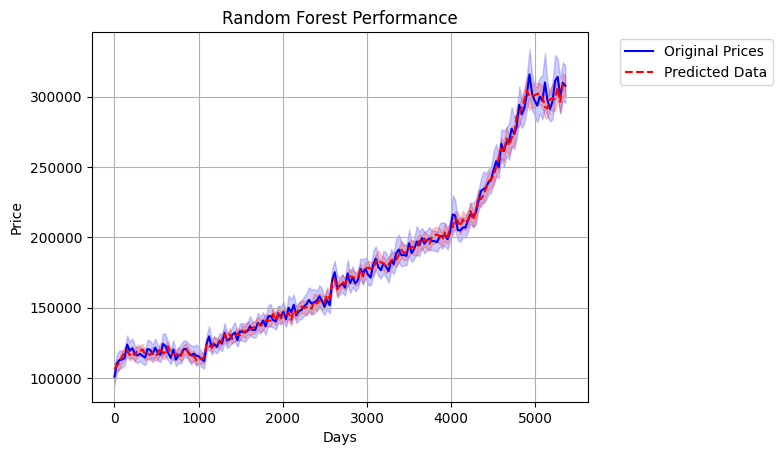

In [24]:
# Plot training data
sns.lineplot(x=df_prediction['Days'], y=y_test_rf, color='blue', label='Original Prices')

# Plot testing data
sns.lineplot(x=df_prediction['Days'], y=y_pred,linestyle='dashed', color='red', label='Predicted Data')

# Add labels and title
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Random Forest Performance')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.grid(True)
plt.show()


Training VS Testing Data Graph w/Bedrooms

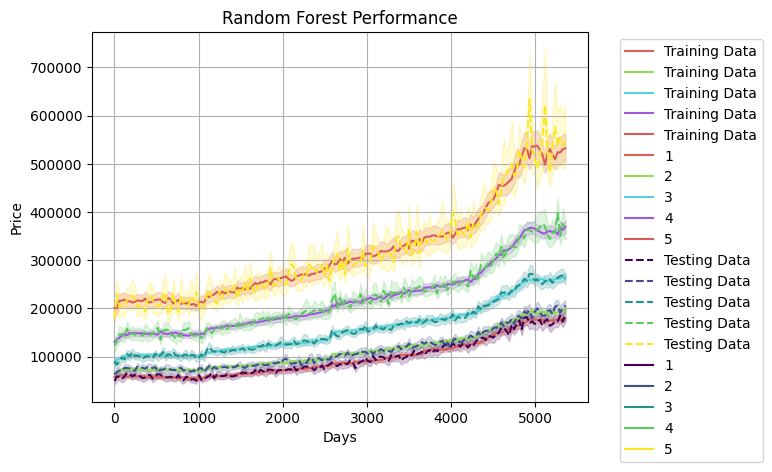

In [25]:
# Plot training data
sns.lineplot(x=X_train_rf['Days'], y=y_train_rf,hue=X_train_rf['Bedrooms'],palette='hls', color='blue', label='Training Data')

# Plot testing data
sns.lineplot(x=X_test_rf['Days'], y=y_test_rf,hue=X_test_rf['Bedrooms'], palette='viridis',linestyle='dashed', color='red', label='Testing Data')

# Add labels and title
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Random Forest Performance')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.grid(True)
plt.show()


#### Random Forest with K(5) Fold

In [32]:
X = melted_df[['Metro','State','Bedrooms', 'Days']]
y = melted_df['Price']
rf_model_kf = RandomForestRegressor(n_estimators=150, random_state=45)
num_folds = 5  # You can adjust this number as needed

# Create a KFold object
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform k-fold cross-validation
cv_results = cross_val_score(rf_model_kf, X, y, cv=kf, scoring='neg_mean_squared_error')

# Calculate the mean squared error across all folds
mse_rf_cv = -cv_results.mean()

# Training the model on the entire dataset
rf_model_kf.fit(X, y)

# Making predictions on the entire dataset
y_pred_rf_kf = rf_model_kf.predict(X)

# Evaluating the Random Forest model on the entire dataset
r2_rf = r2_score(y, y_pred_rf_kf)
mae_rf = mean_absolute_error(y, y_pred_rf_kf)

# Print the results
print(f'Mean Squared Error (Random Forest - Cross-Validation): {mse_rf_cv}')
print(f'R-squared (Random Forest): {r2_rf}')
print(f'Mean Absolute Error (Random Forest): {mae_rf}')

Mean Squared Error (Random Forest - Cross-Validation): 26353027167.424873
R-squared (Random Forest): 0.4520062093643995
Mean Absolute Error (Random Forest): 63592.29889552557


Training VS Tested Line plot for Random Forest with K Fold

In [34]:
#y_pred_rf_kfold = rf_model.predict(X)
df_prediction2=pd.DataFrame({'Days': X['Days'],'Actual':y, 'Predicted':y_pred_rf_kf})

In [35]:
df_prediction2

Days         Actual      Predicted
0           0  275306.849619  189285.839161
1           0  154860.938646   44239.010511
2           0   62285.163536   42252.971813
3           0   95969.312405   94510.649518
4           0  212362.749410  189285.839161
...       ...            ...            ...
1976023  5355  301486.315206  363354.592287
1976024  5355  147873.292483  217952.621190
1976025  5355  165111.289914  217952.621190
1976026  5355  238497.833185  217952.621190
1976027  5355  166878.701382  217952.621190

[1976028 rows x 3 columns]

Plotting Actual Prices Vs Model Predicted prices for Random Forest w/ K Fold


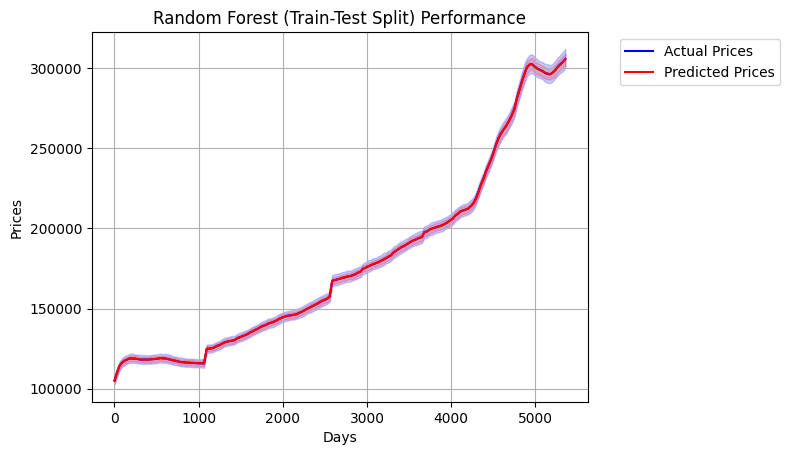

In [36]:
sns.lineplot(x=df_prediction2['Days'],y=df_prediction2['Actual'], color='blue',label='Actual Prices')
sns.lineplot(x=df_prediction2['Days'],y=df_prediction2['Predicted'], color='red',label='Predicted Prices')
plt.xlabel('Days')
plt.ylabel('Prices')
plt.title('Random Forest (Train-Test Split) Performance')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.grid(True)
plt.show()

Plotting Actual Prices Vs Model Predicted prices w/ Bedrooms for Random Forest with K Fold

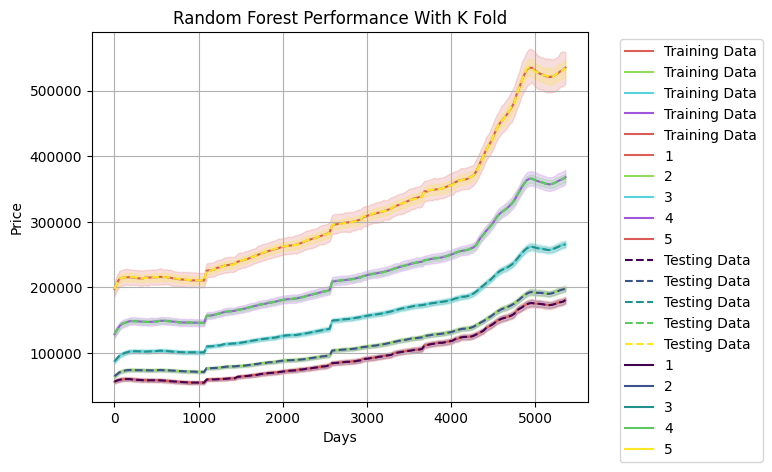

In [37]:
# Plot training data
sns.lineplot(x=X['Days'], y=y,hue=X['Bedrooms'],palette='hls', color='blue', label='Training Data')

# Plot testing data
sns.lineplot(x=X['Days'], y=y_pred_rf_kf,hue=X['Bedrooms'], palette='viridis',linestyle='dashed', color='red', label='Testing Data')

# Add labels and title
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Random Forest Performance With K Fold')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.grid(True)
plt.show()


### Time Series Split

#### Linear Regression

In [68]:
# Define X and y variables for training the dataset
X = melted_df[['Metro','State', 'Bedrooms', 'Days']]
y = melted_df['Price']

# Custom function for date-wise train-test split
def date_based_split(X, y, test_date):
    test_days = (test_date - melted_df['Date'].min()).days
    X_train = X[X['Days'] < test_days]
    X_test = X[X['Days'] >= test_days]
    y_train = y[X['Days'] < test_days]
    y_test = y[X['Days'] >= test_days]
    return X_train, X_test, y_train, y_test

test_date = pd.to_datetime('2021-01-01')

# Perform date-wise split
X_train_lr1, X_test_lr1, y_train_lr1, y_test_lr1 = date_based_split(X, y, test_date)

# Training the model for Linear Regression
lr_model1 = LinearRegression()
lr_model1.fit(X_train_lr1, y_train_lr1)
y_pred_lr = lr_model1.predict(X_test_lr1)

# Evaluating the Linear Regression model
mse_lr = mean_squared_error(y_test_lr1, y_pred_lr)
r2_lr = r2_score(y_test_lr1, y_pred_lr)
mae_lr = mean_absolute_error(y_test_lr1, y_pred_lr)

print(f'Mean Squared Error (Linear Regression): {mse_lr}')
print(f'R-squared (Linear Regression): {r2_lr}')
print(f'Mean Absolute Error (Linear Regression): {mae_lr}')


Mean Squared Error (Linear Regression): 75028739681.79718
R-squared (Linear Regression): 0.09412171563616578
Mean Absolute Error (Linear Regression): 113293.51620743226


#### Random Forest

In [28]:
# Define X and y variables for training the dataset
X = melted_df[['Metro','State', 'Bedrooms', 'Days']]
y = melted_df['Price']

# Custom function for date-wise train-test split
def date_based_split(X, y, test_date):
    test_days = (test_date - melted_df['Date'].min()).days
    X_train = X[X['Days'] < test_days]
    X_test = X[X['Days'] >= test_days]
    y_train = y[X['Days'] < test_days]
    y_test = y[X['Days'] >= test_days]
    return X_train, X_test, y_train, y_test

# Set the test date (e.g., '2016-01-01') for the split
test_date = pd.to_datetime('2021-01-01')

# Perform date-wise split
X_train_rf1, X_test_rf1, y_train_rf1, y_test_rf1 = date_based_split(X, y, test_date)

# Training the model for Random Forest Regression
rf_model1 = RandomForestRegressor(n_estimators = 125, random_state = 42)
rf_model1.fit(X_train_rf1, y_train_rf1)
y_pred_rf1 = rf_model1.predict(X_test_rf1)

# Evaluating the Random Forest Regression model
mse_rf = mean_squared_error(y_test_rf1, y_pred_rf1)
r2_rf = r2_score(y_test_rf1, y_pred_rf1)
mae_rf = mean_absolute_error(y_test_rf1, y_pred_rf1)

print(f'Mean Squared Error (Random Forest): {mse_rf}')
print(f'R-squared (Random Forest): {r2_rf}')
print(f'Mean Absolute Error (Random Forest): {mae_rf}')


Mean Squared Error (Random Forest): 54450751572.48428
R-squared (Random Forest): 0.3425752101661599
Mean Absolute Error (Random Forest): 90213.4882531453


#### Random Forest w/ K Fold Cross Validation with 7 fold

In [21]:
# Define X and y variables for training the dataset
X = melted_df[['Metro', 'State', 'Bedrooms', 'Days']]
y = melted_df['Price']

# Set the test date (e.g., '2016-01-01') for the split
test_date = pd.to_datetime('2021-01-01')

# Custom function for date-wise train-test split
def date_based_split(X, y, test_date):
    test_days = (test_date - melted_df['Date'].min()).days
    X_train = X[X['Days'] < test_days]
    X_test = X[X['Days'] >= test_days]
    y_train = y[X['Days'] < test_days]
    y_test = y[X['Days'] >= test_days]
    return X_train, X_test, y_train, y_test

# Perform date-wise split
X_train_rf1, X_test_rf1, y_train_rf1, y_test_rf1 = date_based_split(X, y, test_date)

# Create a Random Forest Regressor
rf_model1 = RandomForestRegressor(n_estimators=125, random_state=42)

# Specify the number of folds for k-fold cross-validation
num_folds = 7  # You can adjust this number as needed

# Create a KFold object
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Initialize lists to store evaluation metrics
mse_rf_list = []
r2_rf_list = []
mae_rf_list = []

# Perform k-fold cross-validation
for train_index, test_index in kf.split(X_train_rf1):
    X_train, X_val = X_train_rf1.iloc[train_index], X_train_rf1.iloc[test_index]
    y_train, y_val = y_train_rf1.iloc[train_index], y_train_rf1.iloc[test_index]

    # Training the model for Random Forest Regression
    rf_model1.fit(X_train, y_train)
    y_pred_rf1 = rf_model1.predict(X_val)

    # Evaluating the Random Forest Regression model
    mse_rf = mean_squared_error(y_val, y_pred_rf1)
    r2_rf = r2_score(y_val, y_pred_rf1)
    mae_rf = mean_absolute_error(y_val, y_pred_rf1)

    mse_rf_list.append(mse_rf)
    r2_rf_list.append(r2_rf)
    mae_rf_list.append(mae_rf)

# Calculate mean values of metrics across all folds
mean_mse_rf = np.mean(mse_rf_list)
mean_r2_rf = np.mean(r2_rf_list)
mean_mae_rf = np.mean(mae_rf_list)

# Print the results
print(f'Mean Squared Error (Random Forest - 10-Fold Cross-Validation): {mean_mse_rf}')
print(f'Mean R-squared (Random Forest): {mean_r2_rf}')
print(f'Mean Absolute Error (Random Forest): {mean_mae_rf}')


Mean Squared Error (Random Forest - 10-Fold Cross-Validation): 19718269841.70625
Mean R-squared (Random Forest): 0.3674993697851937
Mean Absolute Error (Random Forest): 61666.07552016144


Predicting the prices for all the instances in the dataset for Model Accuracy

In [ ]:
y_pred_rf_kfold = rf_model1.predict(X)
df_prediction3=pd.DataFrame({'Days': X['Days'],'Actual':y, 'Predicted':y_pred_rf_kfold})

In [30]:
df_prediction3

Days         Actual      Predicted
0           0  275306.849619  177535.420748
1           0  154860.938646   48988.721711
2           0   62285.163536   44809.910251
3           0   95969.312405   96023.951103
4           0  212362.749410  177535.420748
...       ...            ...            ...
1976023  5355  301486.315206  150675.932797
1976024  5355  147873.292483  174953.531767
1976025  5355  165111.289914  174953.531767
1976026  5355  238497.833185  174953.531767
1976027  5355  166878.701382  174953.531767

[1976028 rows x 3 columns]

Plotting Actual Prices Vs Model Predicted Prices

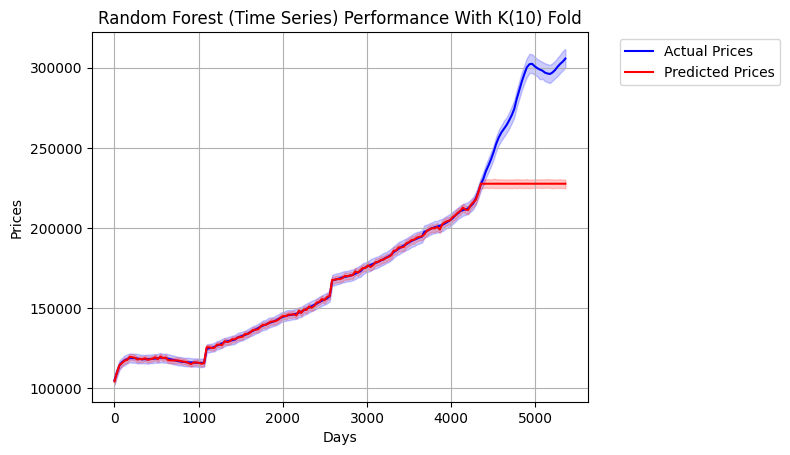

In [31]:
sns.lineplot(x=df_prediction3['Days'],y=df_prediction3['Actual'], color='blue',label='Actual Prices')
sns.lineplot(x=df_prediction3['Days'],y=df_prediction3['Predicted'], color='red',label='Predicted Prices')
plt.xlabel('Days')
plt.ylabel('Prices')
plt.title('Random Forest (Time Series) Performance With K(7) Fold')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.grid(True)
plt.show()

Plotting Actual Prices Vs Model Predicted Prices w/Bedrooms

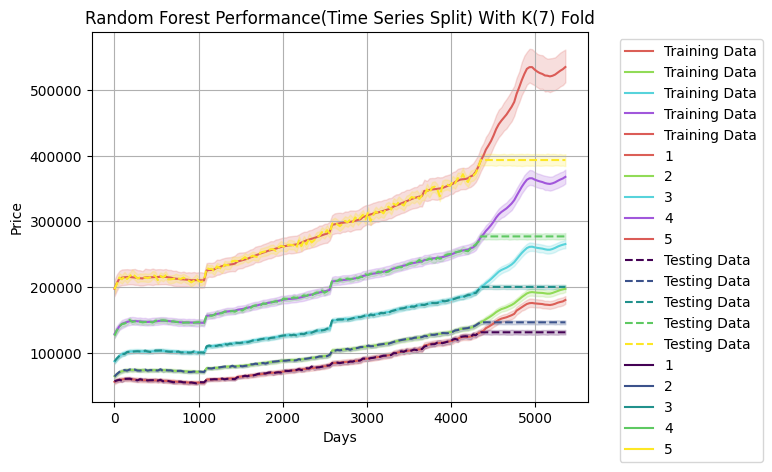

In [40]:
# Plot training data
sns.lineplot(x=df_prediction3['Days'], y=df_prediction3['Actual'],hue=X['Bedrooms'],palette='hls', color='blue', label='Training Data')

# Plot testing data
sns.lineplot(x=df_prediction3['Days'], y=df_prediction3["Predicted"],hue=X['Bedrooms'], palette='viridis',linestyle='dashed', color='red', label='Testing Data')

# Add labels and title
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Random Forest Performance(Time Series Split) With K(7) Fold')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.grid(True)
plt.show()


### Prediction

In [99]:
states = label_encoder.classes_
state_values = dict(enumerate(states))

print(f"State Values: {state_values}")

State Values: {0: 'AK', 1: 'AL', 2: 'AR', 3: 'AZ', 4: 'CA', 5: 'CO', 6: 'CT', 7: 'DC', 8: 'DE', 9: 'FL', 10: 'GA', 11: 'HI', 12: 'IA', 13: 'ID', 14: 'IL', 15: 'IN', 16: 'KS', 17: 'KY', 18: 'LA', 19: 'MA', 20: 'MD', 21: 'ME', 22: 'MI', 23: 'MN', 24: 'MO', 25: 'MS', 26: 'MT', 27: 'NC', 28: 'ND', 29: 'NE', 30: 'NH', 31: 'NJ', 32: 'NM', 33: 'NV', 34: 'NY', 35: 'OH', 36: 'OK', 37: 'OR', 38: 'PA', 39: 'RI', 40: 'SC', 41: 'SD', 42: 'TN', 43: 'TX', 44: 'UT', 45: 'VA', 46: 'VT', 47: 'WA', 48: 'WI', 49: 'WV', 50: 'WY'}
<class 'dict'>
10


Function to predict the future house prices based on the Metro Area, State, Bedrooms, and Date.

The initial inflation index has been set to 3.2 based on the year 2023, but can be modified as well for better accuracy of the prediction

In [140]:
#Days=7600
def prediction(Metro,State,Bedrooms,date):
  State_name=State
  initial_date='2009-01-31'
  for key, value in state_values.items():
          if value == 'GA':
              State=key
  initial_date = datetime.strptime(initial_date, '%Y-%m-%d')
  date = datetime.strptime(date, '%Y-%m-%d')
  Days=(date-initial_date).days
  inflation=3.2
  random_forest_pred=float(rf_model_kf.predict([[Metro,State,Bedrooms,Days]]))
  random_forest_pred1=float(rf_model1.predict([[Metro,State,Bedrooms,Days]]))
  linear_pred=float(lr_model.predict([[Metro,State,Bedrooms,Days]]))
  linear_pred1=float(lr_model1.predict([[Metro,State,Bedrooms,Days]]))

  ensembler_results=[random_forest_pred,random_forest_pred1,linear_pred,linear_pred1]
  print(f"The predicted house value for the date {date} in {State_name} is: $",(np.mean(ensembler_results))*(1+inflation)  )

# Metro=1
# State='GA'
# Bedrooms=2
# date='2028-07-16'
#prediction(Metro,State,Bedrooms,date)
prediction(1,'FL',2,'2025-07-16')
prediction(0,'DC',3,'2024-01-18')

The predicted house value for the date 2025-07-16 00:00:00 in FL is: $ 821803.78164271
The predicted house value for the date 2024-01-18 00:00:00 in DC is: $ 850005.1701616589


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have 

In [141]:
prediction(1,'GA',4,'2023-09-30')
prediction(1,'GA',4,'2024-09-30')
prediction(1,'GA',4,'2025-09-30')
prediction(1,'GA',4,'2030-09-30')

The predicted house value for the date 2023-09-30 00:00:00 in GA is: $ 1326412.877450932
The predicted house value for the date 2024-09-30 00:00:00 in GA is: $ 1349930.556312793
The predicted house value for the date 2025-09-30 00:00:00 in GA is: $ 1373383.9792214793
The predicted house value for the date 2030-09-30 00:00:00 in GA is: $ 1490715.3497180862


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have 